# Setup 

In [1]:
import sys
import os
import getpass
import datajoint as dj
from pipeline import experiment
from pipeline import lab
sys.path.append('/Users/moharb/Documents/Repos/map-ephys/') #
dj.config['database.host'] = 'mesoscale-activity.datajoint.io'
dj.config['database.user'] = 'boazmohar'
dj.config['lab.database'] = 'boazmohar_lab'
dj.config['ccf.database'] = 'boazmohar_ccf'
dj.config['experiment.database'] = 'boazmohar_experiment'

 ···············


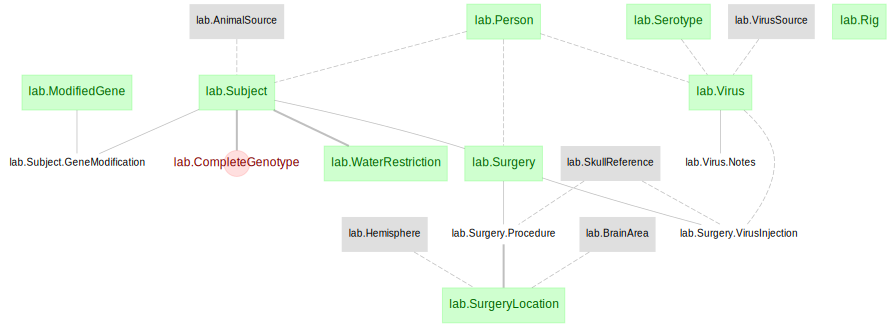

In [8]:
dj.ERD(lab)

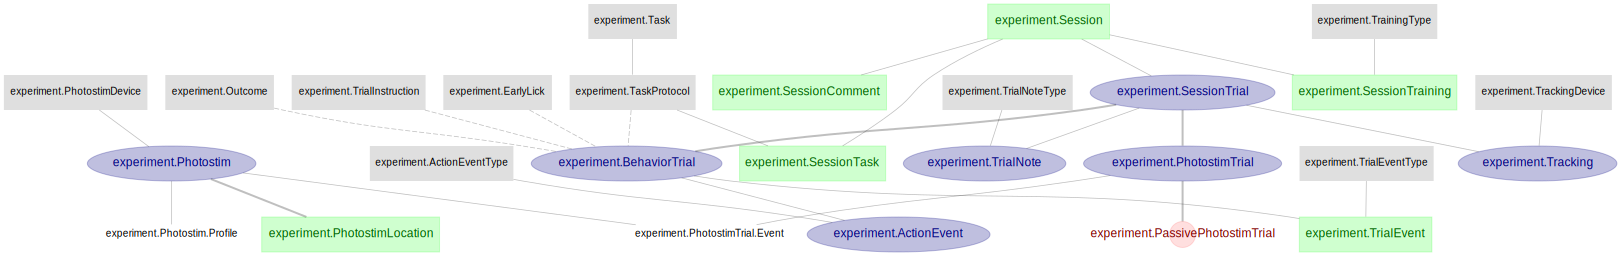

In [75]:
dj.ERD(experiment)

In [4]:
lab.Person().insert1(('boazmohar', 'Boaz Mohar'))
lab.BrainArea().insert1(('V1','Primary visual cortex'))
lab.Rig().insert1(('spine2P','2c.384','High NA 3D resonsnat 2P microscope'))
lab.Serotype.insert1(('AAV2/1', ))
lab.Subject().insert1((415099, 'boazmohar','123','2018-01-01','F','Jackson Labs'))
lab.ModifiedGene.insert1(('Ai148','CRE dependent GCaMP6f TITL2'))
lab.ModifiedGene.insert1(('Syt17','Sparse L23 CRE'))
lab.Subject().GeneModification().insert1((415099, 'Ai148', 'unknown', 'unknown'))
lab.Subject().GeneModification().insert1((415099, 'Syt17', 'unknown', 'unknown'),)
lab.Surgery().insert1((415099,1,'boazmohar','2018-08-09 14:00:00','2018-08-09 17:00:00',
                      'Ai148 Syt17 Voltron Chronos Kv2.1 in left V1'))
lab.Surgery().Procedure().insert1((415099,1,1,'Lambda',2.7,0.5,0,'Headbar and 3.5/3 window'))
lab.Virus().insert1((0, 'Janelia','AAV2/1','boazmohar','ST-Voltron',1e13,
                     '2018-08-08', 'From Schrider lab'))
lab.Virus().insert1((1, 'Janelia','AAV2/1','boazmohar','Chronos-KV2.1',1e13,
                     '2018-08-08', 'First try'))
lab.Surgery().VirusInjection().insert1((415099, 1, 1, 0, 'Lambda', 2.7, 0.5, 0.2, 30, 10,
                                       'Three injection sites'),)
lab.Surgery().VirusInjection().insert1((415099, 1, 2, 1, 'Lambda', 2.7, 0.5, 0.2, 30, 10,
                                       'Four injection sites'),)

In [6]:
lab.Subject().GeneModification()

subject_id institution 6 digit animal ID,gene_modification,zygosity,type
415099,Ai148,Unknown,Unknown
415099,Syt17,Unknown,Unknown


# Imaging 

In [ ]:
import datajoint as dj

schema = dj.schema('boazmohar_imaging')


@schema
class Objective(dj.Manual):
    definition = """
    objective : varchar(24) 
    ----
    objective_descriotion : varchar(255)
    """
    contents = (('4x','Nikon 4x 0.3NA','16x','Olympus 16x 0.8NA',
                 '20x', 'Olympus 20x 1.05NA'))
    
@schema
class Fluorophore(dj.Lookup):
    definition = """  # calcium-sensitive indicators
    fluorophore     : char(10)   # fluorophore short name
    -----
    dye_description = ''  : varchar(2048)
    """
    contents = [
        ['GCaMP6s', ''],
        ['GCaMP6f', ''],
        ['JF525Halo', 'Janelia Flour 525 with halo tag'],
        ['JF585Halo', 'Janelia Flour 585 with halo tag']
    ]
    
@schema
class FOV(dj.Lookup):
    definition = """  # field-of-view sizes for all lenses and magnifications
    -> ecRig
    -> Lens
    mag         : decimal(5,2)  # ScanImage zoom factor
    fov_ts      : datetime      # fov measurement date and time
    ---
    height      : decimal(5,1)  # measured height of field of view along axis of pipette (medial/lateral on mouse)
    width       : decimal(5,1)  # measured width of field of view perpendicular to pipette (rostral/caudal on mouse)
    """


@schema
class Anesthesia(dj.Lookup):
    definition = """   #  anesthesia states
    anesthesia                     : char(20) # anesthesia short name
    ---
    anesthesia_description=''       : varchar(255) # longer description
    """
    contents = [
        ['awake', ''],
        ['fentanyl', ''],
        ['isoflurane', '']
]

In [10]:
list(zip(['Jackson Labs', 'Allen Institute', 'Charles River', 'MMRRC', 'Taconic', 'Other']))

[('Jackson Labs',),
 ('Allen Institute',),
 ('Charles River',),
 ('MMRRC',),
 ('Taconic',),
 ('Other',)]

# Drop 

In [82]:
def dropdbs():
    print('dropping databases: \n\n')
    for d in ['experiment', 'lab', 'ccf']:
        try:
            schema = dj.schema('boazmohar_%s' % d, locals())
            schema.drop(force=True)
            print('dropping {d}'.format(d=d))
        except Exception as e:
            print('error dropping {d}: {e}'
                 .format(d=d, e=str(e)))
dropdbs()

dropping databases: 


dropping experiment
dropping lab
dropping ccf
